In [ ]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


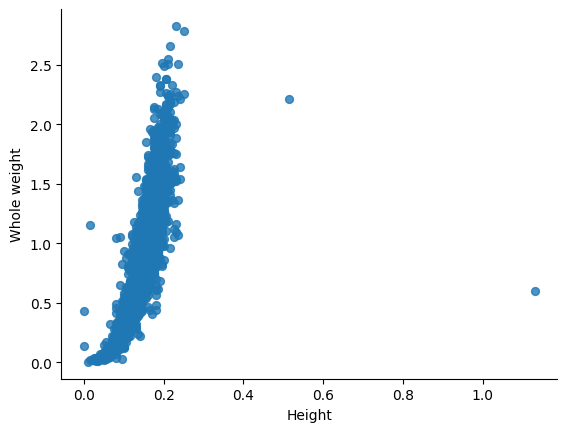

In [ ]:
# @title Height vs Whole weight

from matplotlib import pyplot as plt
abalone_train.plot(kind='scatter', x='Height', y='Whole weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

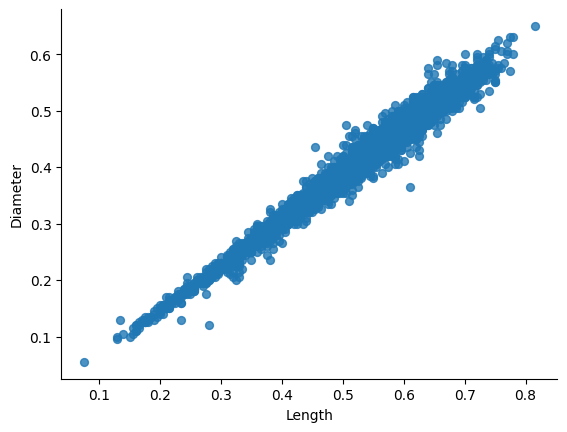

In [ ]:
# @title Length vs Diameter

from matplotlib import pyplot as plt
abalone_train.plot(kind='scatter', x='Length', y='Diameter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

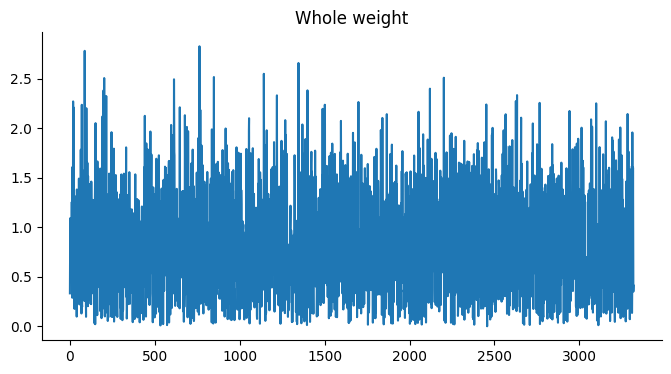

In [ ]:
# @title Whole weight

from matplotlib import pyplot as plt
abalone_train['Whole weight'].plot(kind='line', figsize=(8, 4), title='Whole weight')
plt.gca().spines[['top', 'right']].set_visible(False)

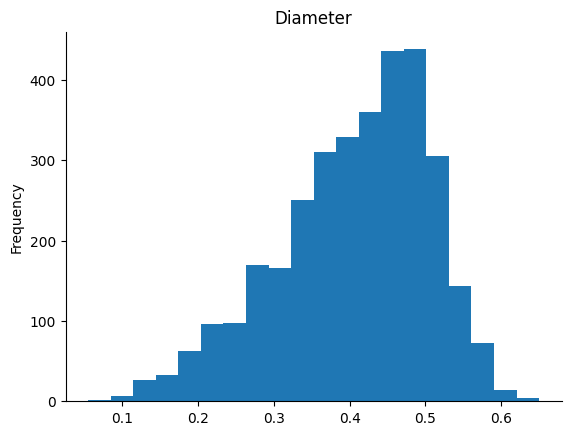

In [ ]:
# @title Diameter

from matplotlib import pyplot as plt
abalone_train['Diameter'].plot(kind='hist', bins=20, title='Diameter')
plt.gca().spines[['top', 'right',]].set_visible(False)

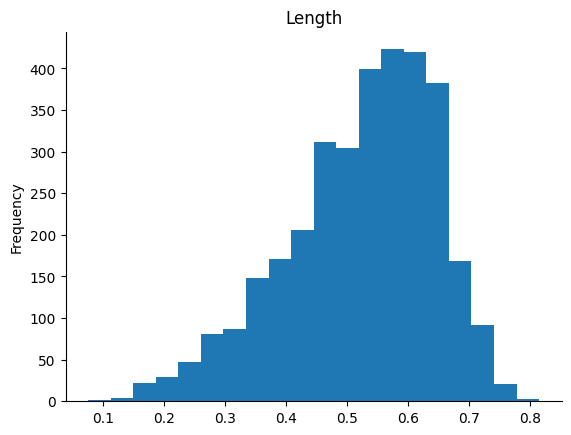

In [ ]:
# @title Length

from matplotlib import pyplot as plt
abalone_train['Length'].plot(kind='hist', bins=20, title='Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [ ]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [ ]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [ ]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 80.6463
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 21.5250
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 9.3172
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 8.6727
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 8.1305
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 7.6596
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 7.2315
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 6.9016
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 6.6783
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 6.4623


In [ ]:
normalize = layers.Normalization()

In [ ]:
normalize.adapt(abalone_features)

In [ ]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 3ms/step - loss: 77.7109
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 38.3250
Epoch 3/10
104/104 [==============================] - 1s 6ms/step - loss: 27.4252
Epoch 4/10
104/104 [==============================] - 1s 5ms/step - loss: 18.3322
Epoch 5/10
104/104 [==============================] - 1s 6ms/step - loss: 10.7072
Epoch 6/10
104/104 [==============================] - 1s 6ms/step - loss: 7.5638
Epoch 7/10
104/104 [==============================] - 1s 6ms/step - loss: 6.6351
Epoch 8/10
104/104 [==============================] - 0s 4ms/step - loss: 6.1874
Epoch 9/10
104/104 [==============================] - 0s 3ms/step - loss: 5.8808
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 5.6401


In [ ]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


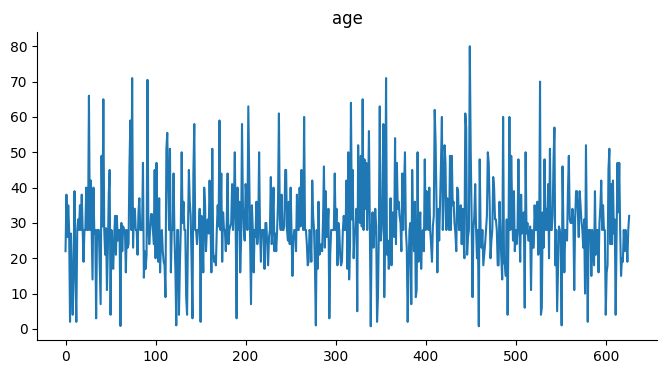

In [ ]:
# @title age

from matplotlib import pyplot as plt
titanic['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

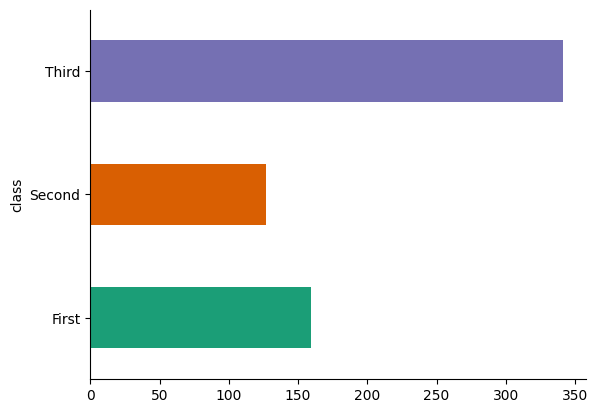

In [ ]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
titanic.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

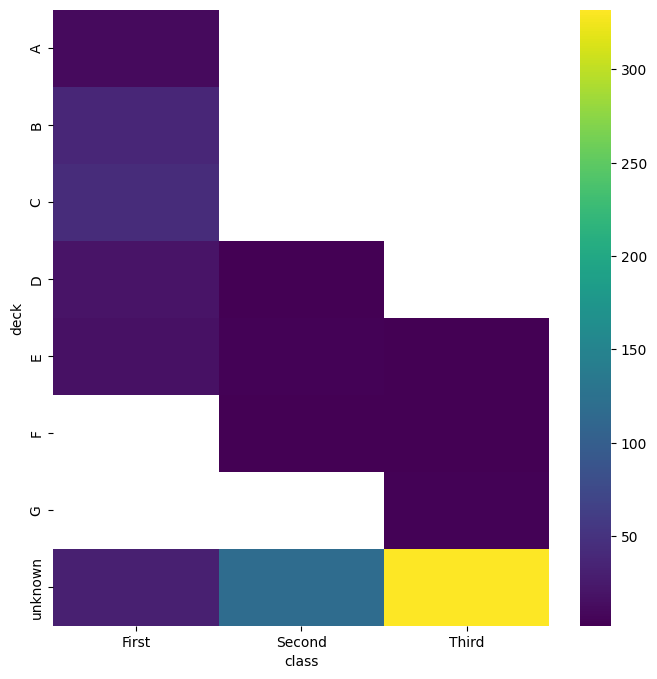

In [ ]:
# @title class vs deck

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['deck'].value_counts()
    for x_label, grp in titanic.groupby('class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('class')
_ = plt.ylabel('deck')

<ipython-input-19-184cace55884>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(titanic, x='survived', y='deck', inner='box', palette='Dark2')


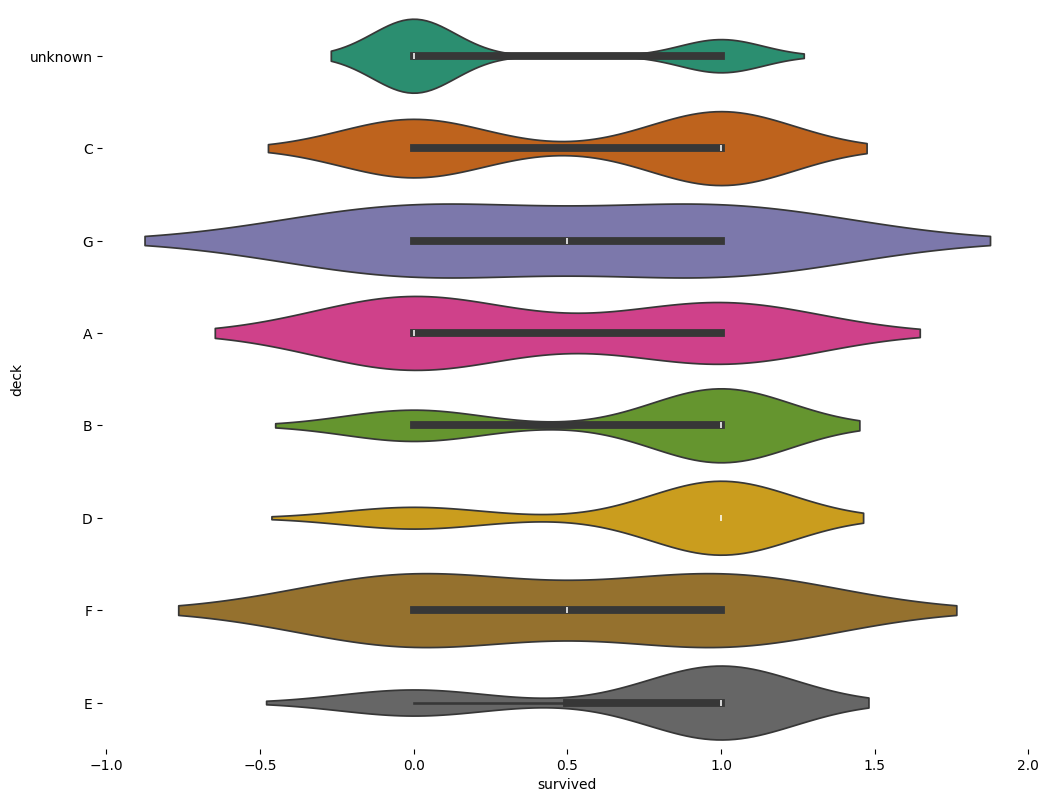

In [ ]:
# @title deck vs survived

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(titanic['deck'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(titanic, x='survived', y='deck', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [ ]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [ ]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [ ]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


In [ ]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [ ]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [ ]:
preprocessed_inputs = [all_numeric_inputs]

In [ ]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

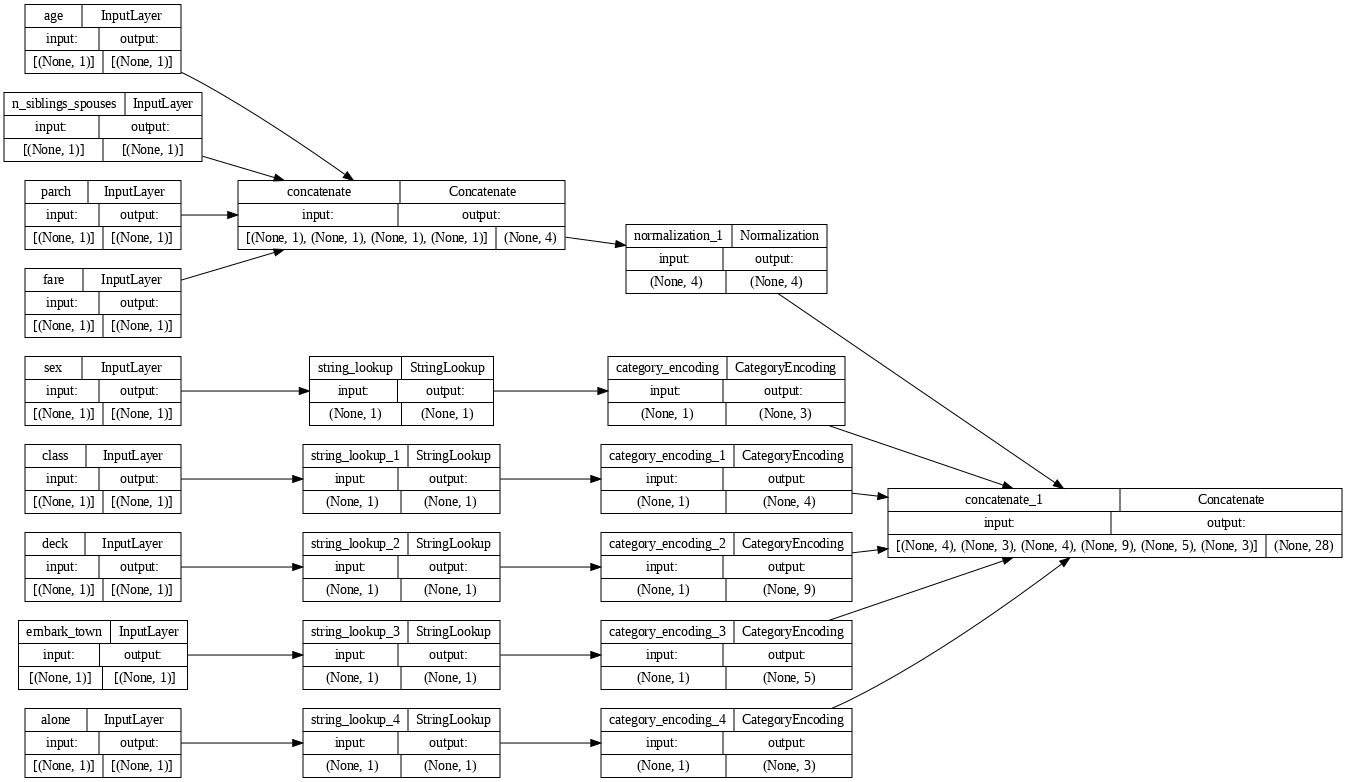

In [ ]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [ ]:
titanic_features_dict = {name: np.array(value)
                         for name, value in titanic_features.items()}

In [ ]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [ ]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [ ]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 2s 6ms/step - loss: 0.7155
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6259
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5690
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5280
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4950
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4705
Epoch 7/10
20/20 [==============================] - 0s 13ms/step - loss: 0.4500
Epoch 8/10
20/20 [==============================] - 0s 11ms/step - loss: 0.4358
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4254
Epoch 10/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4186


In [ ]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

In [ ]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.769]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.769]], shape=(1, 1), dtype=float32)


In [ ]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

In [ ]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [ ]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [ ]:
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [ ]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [ ]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [ ]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 1s 5ms/step - loss: 0.4140
Epoch 2/5
20/20 [==============================] - 0s 6ms/step - loss: 0.4102
Epoch 3/5
20/20 [==============================] - 0s 5ms/step - loss: 0.4071
Epoch 4/5
20/20 [==============================] - 0s 7ms/step - loss: 0.4046
Epoch 5/5
20/20 [==============================] - 0s 6ms/step - loss: 0.4023


In [ ]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

30874/30874 [==============================] - 0s 0us/step


In [ ]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


In [ ]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'male' b'female' b'male' b'male' b'male']
age                 : [16. 37. 44. 28. 65.]
n_siblings_spouses  : [0 0 2 8 0]
parch               : [0 0 0 2 1]
fare                : [ 9.217  9.587 90.    69.55  61.979]
class               : [b'Third' b'Third' b'First' b'Third' b'First']
deck                : [b'unknown' b'unknown' b'C' b'unknown' b'B']
embark_town         : [b'Southampton' b'Southampton' b'Queenstown' b'Southampton' b'Cherbourg']
alone               : [b'y' b'y' b'n' b'n' b'n']

label               : [0 0 0 0 0]


In [ ]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz',
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

   8192/Unknown - 0s 0us/step

In [ ]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [287.82 291.22 259.22 287.21 286.43]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [56  0  1 90 40]
weather_main        : [b'Rain' b'Clear' b'Clear' b'Clouds' b'Clouds']
weather_description : [b'heavy intensity rain' b'Sky is Clear' b'sky is clear'
 b'overcast clouds' b'scattered clouds']
date_time           : [b'2013-06-06 15:00:00' b'2013-07-05 07:00:00' b'2013-03-20 08:00:00'
 b'2013-05-28 20:00:00' b'2013-04-30 10:00:00']

label               : [6291 3702 6010 2639 4541]


In [ ]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 26.2 s, sys: 4.23 s, total: 30.4 s
Wall time: 38.1 s


In [ ]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 3.47 s, sys: 279 ms, total: 3.74 s
Wall time: 4.3 s


In [ ]:
%%time
snapshotting = traffic_volume_csv_gz_ds.snapshot('titanic.tfsnap').shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 5.06 s, sys: 457 ms, total: 5.52 s
Wall time: 9.62 s


In [ ]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

   8192/Unknown - 0s 0us/step

In [ ]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [ ]:
len(font_csvs)

153

In [ ]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

In [ ]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'GUNPLAY' b'EDWARDIAN' b'GUNPLAY' b'CITYBLUEPRINT' b'ITALIC' b'BERNARD'
 b'PRISTINA' b'BODONI' b'RAGE' b'RAGE']
fontVariant         : [b'GUNPLAY' b'EDWARDIAN SCRIPT ITC' b'GUNPLAY' b'CITYBLUEPRINT' b'ITALICT'
 b'BERNARD MT CONDENSED' b'PRISTINA' b'BODONI MT POSTER COMPRESSED'
 b'RAGE ITALIC' b'RAGE ITALIC']
m_label             : [   40   250   105 61690  1050    38  8706   381   192   180]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 1 1 1 1 0 0 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [31 47 34 43 41 32 28 20 20 44]
m_left              : [21 23 23 22 20 27 21 21 26 38]
originalH           : [55 31 45 48 50 54 51 62 56  9]
originalW           : [11 27 25 33 76 44 24 19 37 10]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [1 1 1 1 1 1 1 1 1 1]
r0c1                : [1 1 1 1 1 1 1 1 1 1]
r0c2     

In [ ]:
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

In [ ]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 61667 (\uf0e3) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 61667 (\uf0e3) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


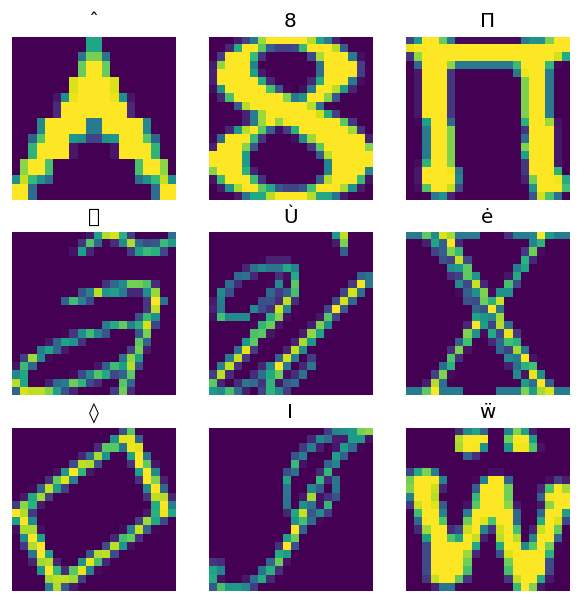

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

In [ ]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [ ]:
features = tf.io.decode_csv(lines, record_defaults=all_strings)

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [ ]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [ ]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [ ]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types)

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [ ]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [ ]:
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    tf.data.TextLineDataset(titanic_file_path)
    .skip(1)
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [ ]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [ ]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

In [ ]:
font_csvs[0]

'fonts/AGENCY.csv'

In [ ]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs,
    record_defaults=font_column_types,
    header=True)

In [ ]:
for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [ ]:
font_files = tf.data.Dataset.list_files("fonts/*.csv")

In [ ]:
print('Epoch 1:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'fonts/PANROMAN.csv'
     b'fonts/MAIANDRA.csv'
     b'fonts/MONEY.csv'
     b'fonts/CENTAUR.csv'
     b'fonts/GADUGI.csv'
    ...

Epoch 2:
     b'fonts/GOUDY.csv'
     b'fonts/SITKA.csv'
     b'fonts/BERNARD.csv'
     b'fonts/CITYBLUEPRINT.csv'
     b'fonts/GOTHICE.csv'
    ...


In [ ]:
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
    path,
    record_defaults=font_column_types,
    header=True)

In [ ]:
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

In [ ]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(int(row[2].numpy())))

pd.DataFrame(fonts_dict)

,font_name,character
0,NINA,ﬂ
1,EDWARDIAN,
2,GEORGIA,ﬄ
3,NINA,ﬁ
4,EDWARDIAN,
5,GEORGIA,ﬃ
6,NINA,
7,EDWARDIAN,◊
8,GEORGIA,ﬂ
9,NINA,


In [ ]:
BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [ ]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
  print('.',end='')

print()

....................
CPU times: user 31.9 s, sys: 2.15 s, total: 34 s
Wall time: 32.1 s


In [ ]:
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1),
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [ ]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')

print()

....................
CPU times: user 4.26 s, sys: 54.2 ms, total: 4.31 s
Wall time: 2.49 s
